In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
red = pd.read_csv('./winequality-red.csv', sep=";")
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
white = pd.read_csv('./winequality-white.csv', sep=';')
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
print(red.shape)
print(white.shape)

(1599, 12)
(4898, 12)


In [5]:
Xw = white[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide',
        'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'] ]
Xr = red[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide',
        'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'] ]

In [6]:
Xall = pd.concat([Xw,Xr], ignore_index=True, axis=0)
Xall.shape

(6497, 11)

In [7]:
from sklearn.preprocessing import StandardScaler
scaled_Xr = Xr.copy()
scaler = StandardScaler()
scaled_Xr = pd.DataFrame(scaler.fit_transform(scaled_Xr), columns = scaled_Xr.columns)

scaled_Xw = Xw.copy()
scaled_Xw = pd.DataFrame(scaler.fit_transform(scaled_Xw), columns = scaled_Xw.columns)

scaled_Xall = Xall.copy()
scaled_Xall = pd.DataFrame(scaler.fit_transform(scaled_Xall), columns = scaled_Xall.columns)

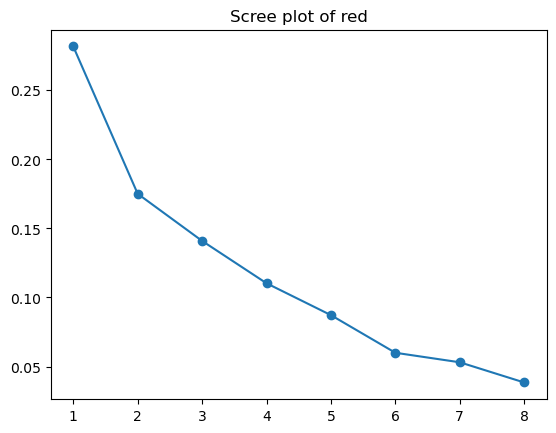

In [8]:
from sklearn.decomposition import PCA
pcar = PCA(n_components=8).fit(scaled_Xr)
plt.plot(np.arange(1,9), pcar.explained_variance_ratio_,'o-')
plt.title('Scree plot of red')
plt.show()

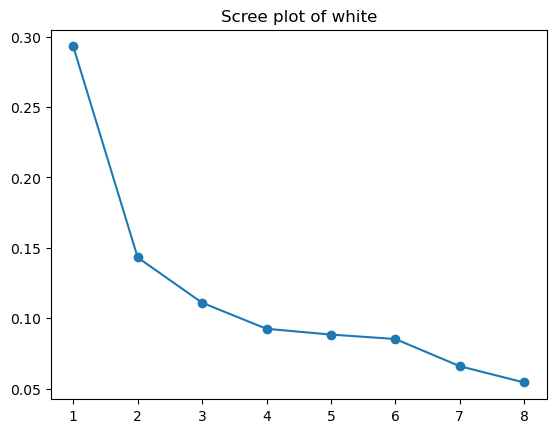

In [9]:
pcaw = PCA(n_components=8).fit(scaled_Xw)
plt.plot(np.arange(1,9), pcaw.explained_variance_ratio_,'o-')
plt.title('Scree plot of white')
plt.show()

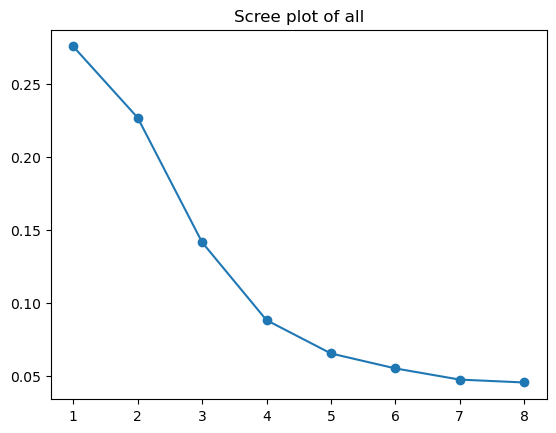

In [10]:
pcall = PCA(n_components=8).fit(scaled_Xall)
plt.plot(np.arange(1,9), pcall.explained_variance_ratio_,'o-')
plt.title('Scree plot of all')
plt.show()

<Figure size 1500x800 with 0 Axes>

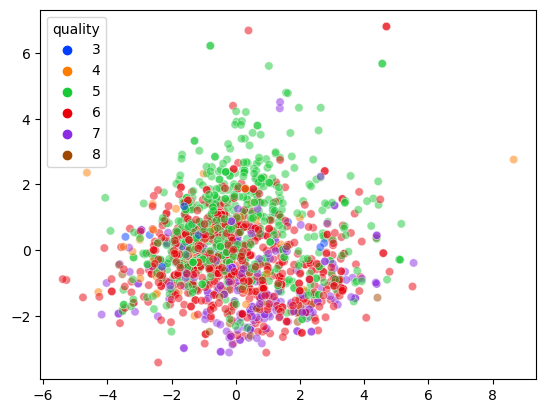

<Figure size 1500x800 with 0 Axes>

In [11]:
Zr = pcar.transform(scaled_Xr)
yr = red['quality']

sns.scatterplot(x = Zr[:,0], y = Zr[:,1], hue=yr, palette = "bright", alpha = 0.5)
plt.figure(figsize=(15,8))

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
Z = Zr[:,0:3]

Z_train, Z_test, yr_train, yr_test = train_test_split(Z, yr, test_size=0.30)

model=MLPRegressor(max_iter = 5000)
model.fit(Z_train,yr_train)

model.score(Z_test,yr_test)

0.24041873311978734

<AxesSubplot: >

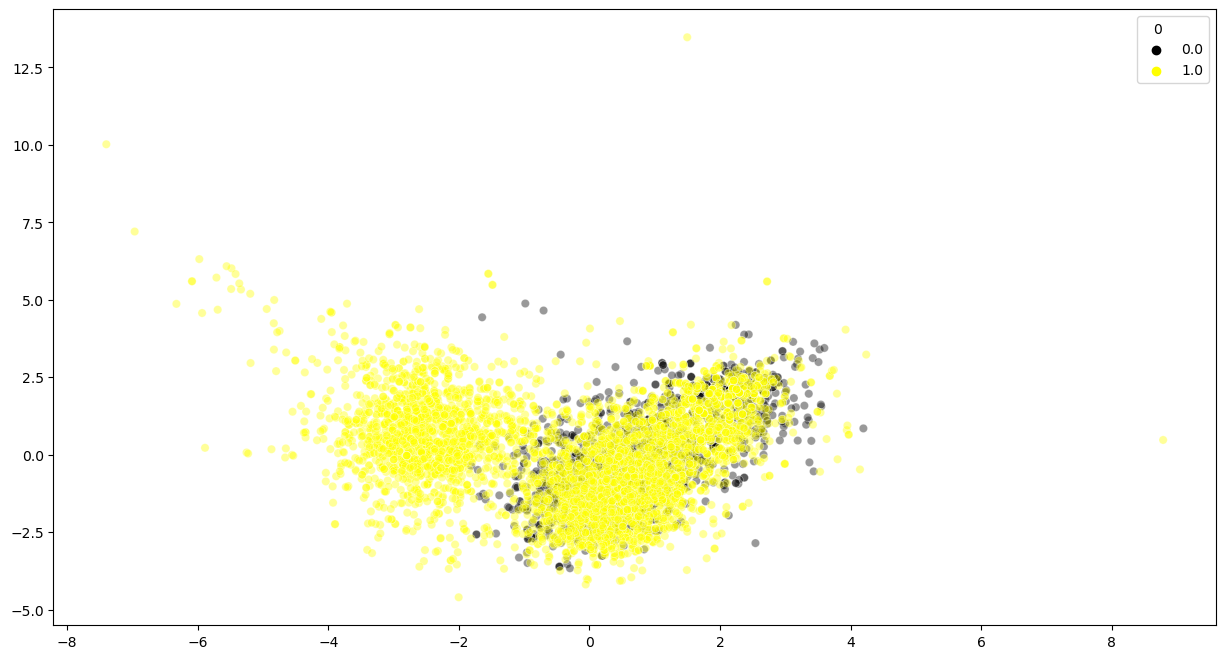

In [13]:
Z = pcall.transform(scaled_Xall)
r = pd.DataFrame(np.zeros(1599))
w = pd.DataFrame(np.ones(4898))
ylabel = pd.concat([r,w], ignore_index=True, axis=0)
plt.figure(figsize=(15,8))
sns.scatterplot(x=Z[:,0],y=Z[:,1], hue=ylabel.squeeze(), palette=['black','yellow'], alpha=0.4)

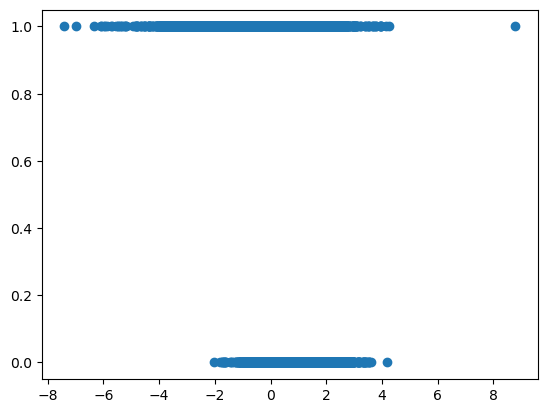

In [14]:
plt.scatter(Z[:,0],ylabel)

In [16]:
from sklearn.neural_network import MLPClassifier

Zall = pcall.transform(scaled_Xall)
Z = Zall[:,0:3]
Z_train, Z_test, yw_train, yw_test = train_test_split(Z, ylabel, train_size = 0.7, test_size=0.3)

model = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='relu', max_iter=500)
model.fit(Z_train,yw_train)

model.score(Z_test,yw_test)

/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7451282051282051